# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [61]:
#importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [62]:
#lendo o arquivo
df = pd.read_csv('/kaggle/input/previsao-de-renda/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [64]:
#dropando colunas do tipo object
df1 = df.drop(columns =['data_ref','sexo','tipo_renda','educacao','estado_civil', 'tipo_residencia','Unnamed: 0','index'])

#correlaçao entre as variaveis
df1.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


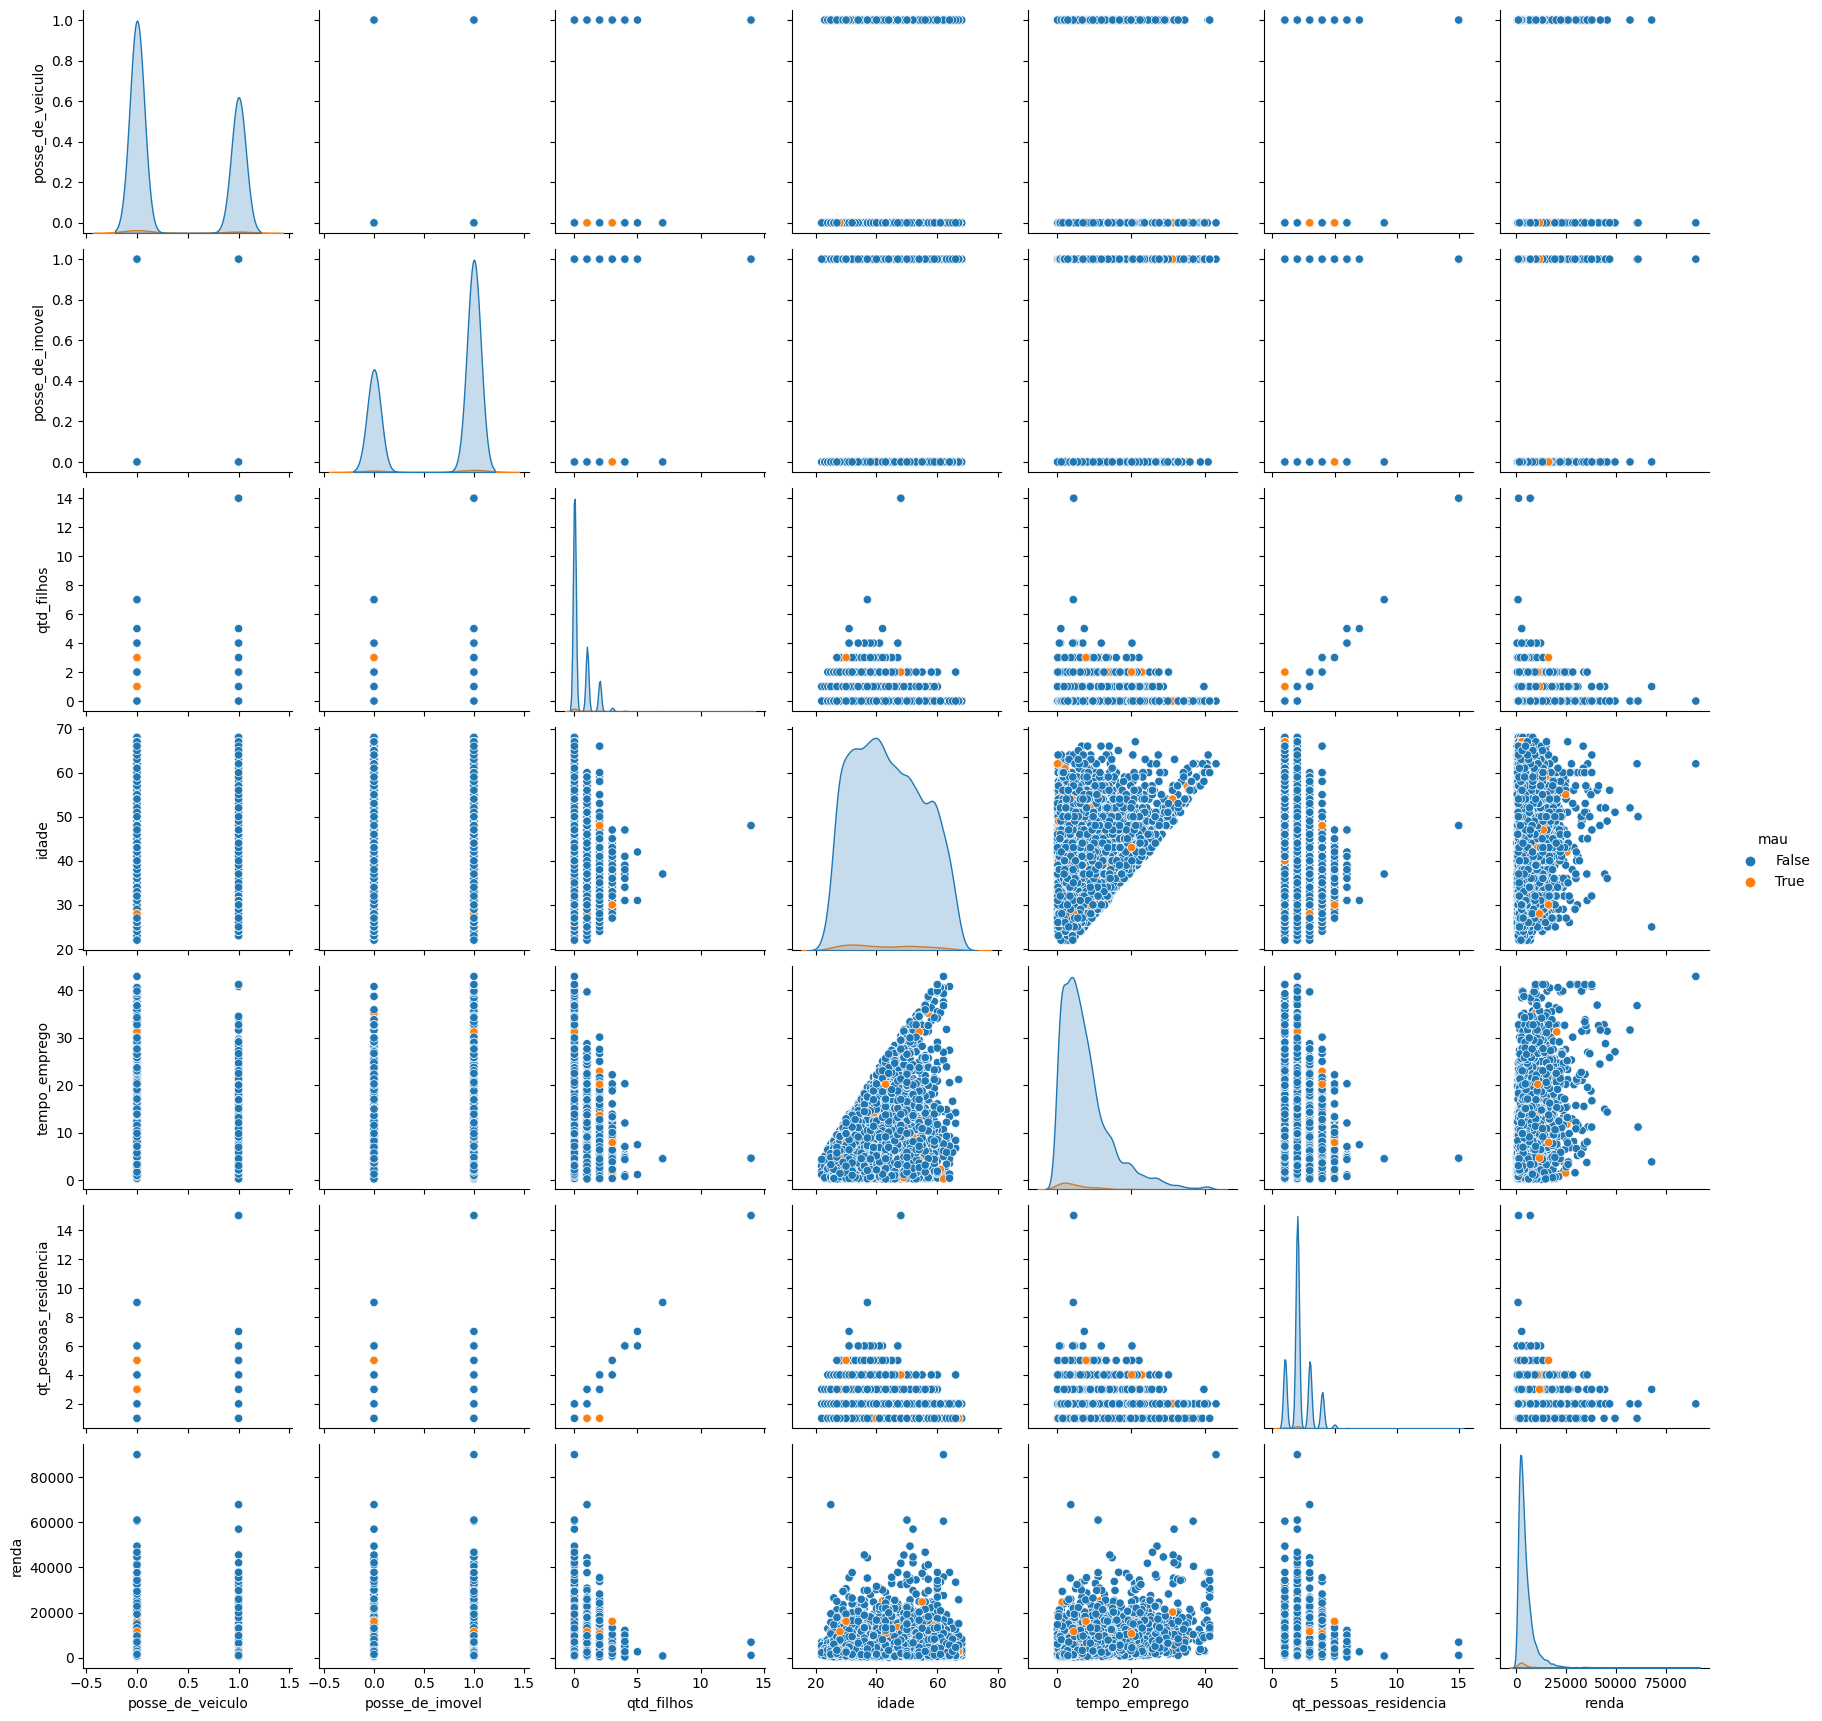

In [40]:
#grafico de matriz de dispersao

warnings.filterwarnings("ignore")
sns.pairplot(df1, hue='mau')

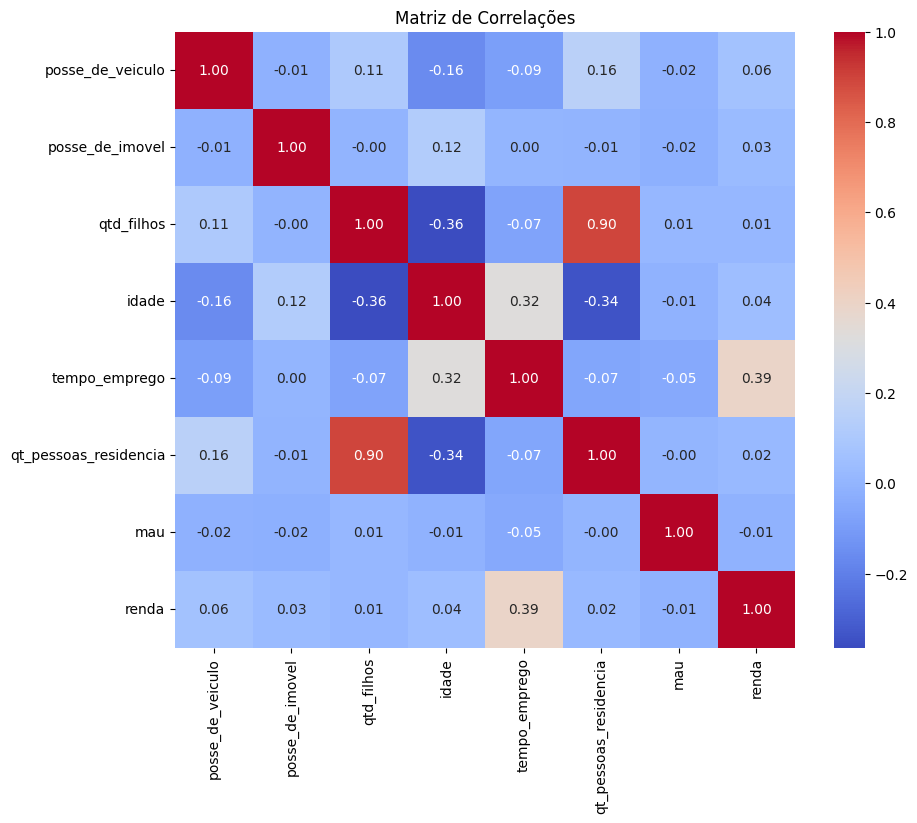

In [55]:
# Criando uma matriz de correlação por um mapa de calor
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlações")
plt.show()

Pontos observados:
1. A variavel tempo_emprego se relaciona muito bem com a renda e a idade. No ponto da logica essa variavel esta condizente uma vez que quanto mais tempo no emprego maior a possibilidade de promoções aumentando a renda, e tambem o aumento da idade (experiencia).
2. A Variavel qtd_filhos se relaciona muito bem com a quantidade de pessoas na residencia, o que faz todo sentido uma vez que quanto maior a quantidade de filhos haverá mais pessoas na casa.
3. A variavel idade se relaciona bem tambem com a quantidade de pessoas na casa.
4. As demais variaveis não possuem uma relação significante.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='idade'>

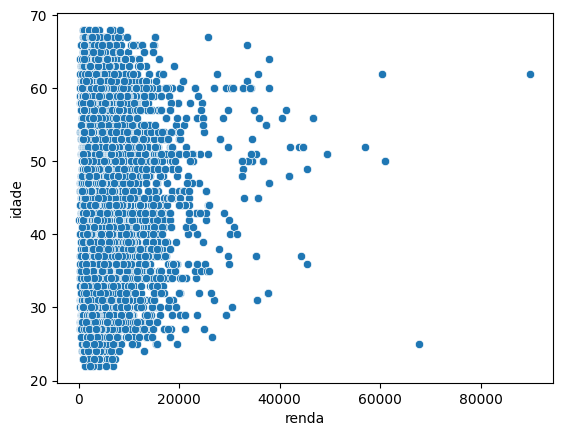

In [59]:
#As duas variaveis numericas mais correlacionadas com a renda sao: idade e tempo_emprego
sns.scatterplot(data=df1, x="renda", y="idade")

<Axes: xlabel='renda', ylabel='tempo_emprego'>

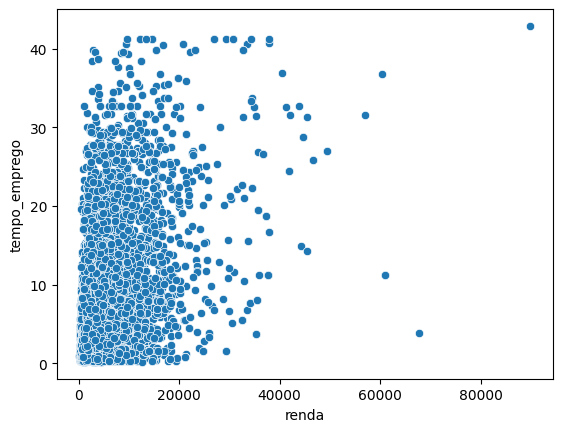

In [45]:
sns.scatterplot(data=df1, x="renda", y="tempo_emprego")

3) Na su aopinião, há outliers na variável renda?

In [ ]:
#Sim, existem alguns pontos muito dispersos como rendas acima de 60k com menos de 10 meses de tempo de emprego

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [47]:
#calculando o logaritmo
df1_log = df1.copy()
df1_log['log_renda'] = np.log(df1_log['renda'])

In [52]:
df1_log.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
0,False,True,1,36,3.575342,3.0,False,3369.24,8.122442
1,True,True,0,42,0.860274,2.0,False,6096.14,8.715411
2,True,True,2,31,8.065753,4.0,False,5658.98,8.640999
3,True,False,0,50,1.208219,2.0,False,7246.69,8.888300
4,False,False,0,52,13.873973,2.0,False,4017.37,8.298383


In [53]:
df1_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_renda,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

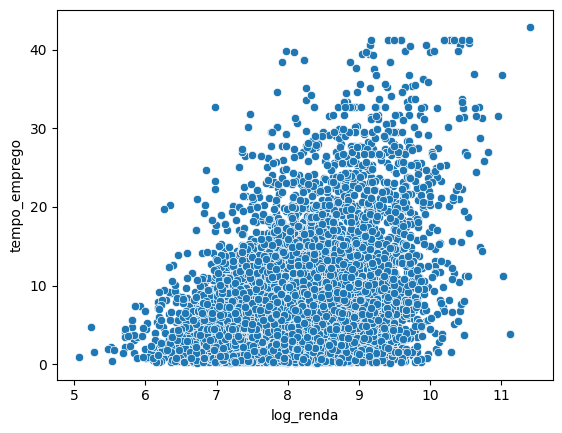

In [57]:
sns.scatterplot(x='log_renda', y='tempo_emprego', data = df1_log)

<Axes: xlabel='log_renda', ylabel='idade'>

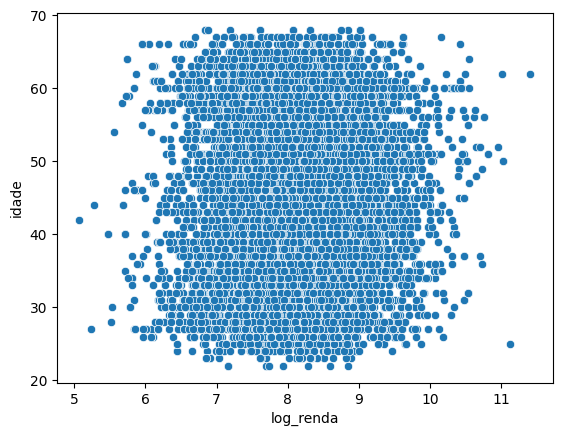

In [60]:
sns.scatterplot(x='log_renda', y='idade', data = df1_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log sobre a renda melhorou a análise, removendo muitos outliers. Porem mesmo assim pelo fato de as correlações da maioria das variáveis serem baixas em relação a renda não foi possível ter uma conclusão definitiva.
Já em relação ao tempo_emprego x log renda o gráfico ficou mais claro levando a uma leve tendencia de quanto maior o tempo de emprego maior será a renda. O que era muito difícil de dizer olhando apenas o gráfico de tempo_emprego x  renda normal.